# Final Project （Group 36） #


### Introduction: Manreet  
### Methods – Exploratory - Shuokai Huang
### Methods – predictive - Bennett  
### Discussion - Xiany  

## 1. Introduction

    In the gaming industry, understanding how much time a player spends in a game can help developers design better user experiences and refine marketing strategies. These improvements can make more players subscribe to game-related newsletters, in hopes of doing well in the game. However, not all players choose to subscribe to the newsletter, but identifying the factors that influence these decisions can help improve certain areas that need more effort.

	To better understand certain behaviours, our project investigates the following: Can total hours played on the Minecraft server and age predict whether the player will subscribe to the game-related newsletter in the players.csv dataset? Additionally, we explore how this changes based on experience level, as we may find different engagement patterns in each experience level. 
    
	To address this question, we used the players.csv dataset, which contained detailed information about Minecraft server users. The dataset included variables such as age, gender, total hours played, experience level, and whether they have subscribed to the newsletter. By applying classification techniques, we aim to model and predict newsletter subscription behaviour based on the data provided. 
    
	This method will not only provide insights for any observable patterns of player engagement, but also demonstrate the importance of using classification models in predictive analysis, building on previous individual analysis that focused more on descriptive and exploratory approaches.


## 2. Importing and Tidying data 

In [1]:
library(tidyverse)
library(tidymodels)

url = "https://drive.google.com/uc?export=download&id=1gl3xMGBBIjHpG4kwIY-g84_ijx2sQYIa"
players <- read_csv(url)
dim(players); head(players)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

[1] 196   7

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


**First, we check whether there are any NAs in the data. If so, we need to remove them.**

In [2]:
clean_players <- players |>
map_lgl(anyNA)
clean_players 

experience    subscribe  hashedEmail played_hours         name       gender 
       FALSE        FALSE        FALSE        FALSE        FALSE        FALSE 
         Age 
        TRUE

**We found that only the Age column contained NAs, so we need to remove them. Additionally, we must exclude players with zero game duration, as they provide no useful data for this data analysis.**

In [3]:
clean_players <- players |>
filter(!is.na(Age)) |>
filter(played_hours>0)
head(clean_players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23


In [4]:
clean_players$subscribe <- factor(clean_players$subscribe)

### Data Description

In [5]:
summary(clean_players)

  experience        subscribe  hashedEmail         played_hours   
 Length:109         FALSE:25   Length:109         Min.   :  0.10  
 Class :character   TRUE :84   Class :character   1st Qu.:  0.10  
 Mode  :character              Mode  :character   Median :  0.50  
                                                  Mean   : 10.51  
                                                  3rd Qu.:  1.80  
                                                  Max.   :223.10  
     name              gender               Age      
 Length:109         Length:109         Min.   : 9.0  
 Class :character   Class :character   1st Qu.:17.0  
 Mode  :character   Mode  :character   Median :20.0  
                                       Mean   :21.3  
                                       3rd Qu.:23.0  
                                       Max.   :58.0  

+ **Observation**:109
+ **Summary Statistics**:
  

   played_hours:  
   Min.   :  0.10  
   Median :  0.10    
   Mean   :  10.51   
   Max.   :  223.10    

   Age:  
   Min.   :  9.0   
   Median :  20.0    
   Mean   :  21.3   
   Max.   :  58.00  

   subscribe:  
   FALSE:25   
   TRUE :84
  
+ **Variables**:7  
  1.experience: Categorical. The experience of the player has in Minecraft.  
  2.subscribe: Categorical. If the player subscribled to a game-related news.  
  3.hashedEmail: Categorical. The email of players.  
  4.played_hours: Numerical. The number of hours a player played on the PlaiCraft server.  
  5.name: Categorical. The players' names.  
  6.gender: Categorical. The players' gender.  
  7.Age: Numerical. The age of player.
  
  The dataset contains 109 observations and 7 variables describing Minecraft players on the PlaiCraft server. Two numerical variables are present: played_hours, which ranges from 0.10 to 223.10 hours (mean = 10.51, median = 0.10), and Age, which ranges from 9 to 58 years (mean = 21.3, median = 20). The remaining variables are categorical. experience represents the player’s skill level in Minecraft, while subscribe indicates whether the player subscribed to a game-related newsletter, with 84 subscribed players and 25 non-subscribed players. Additional categorical variables include hashedEmail (unique identifier for players), name, and gender. Overall, this dataset provides information on player demographics and gameplay activity, suitable for exploring whether gameplay behaviour or age is associated with the likelihood of subscribing.

### **Visualization**

**1.We examined the age distribution of participants and their corresponding subscription status.**

**Figure 1.** Visualization of number of people subscribed to newsletter based on Age group

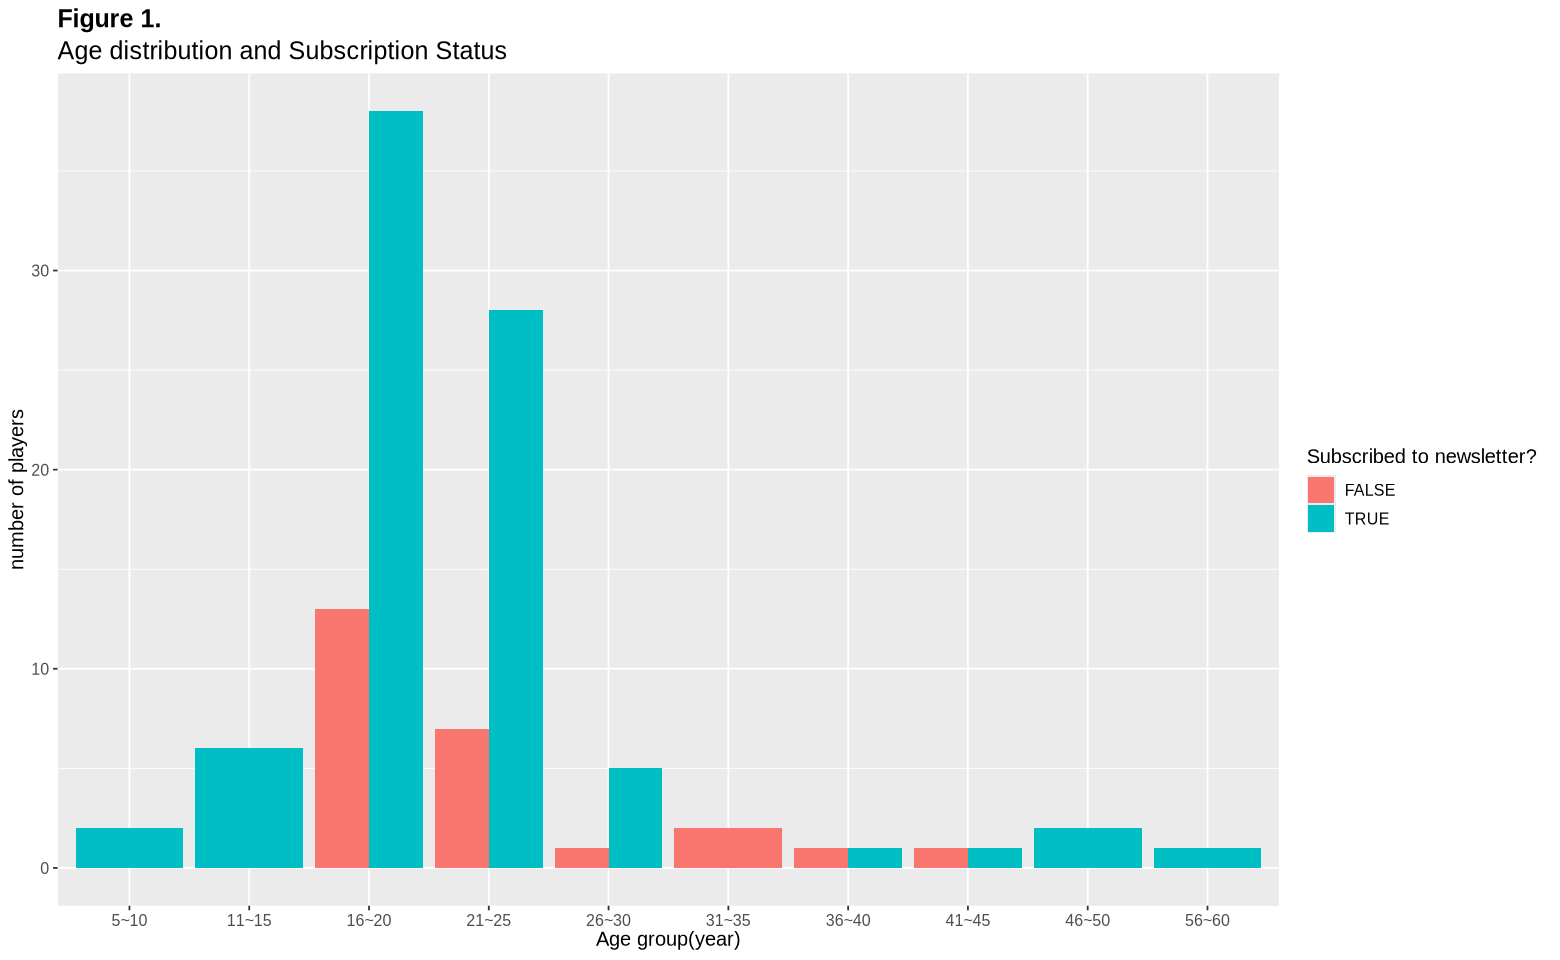

In [52]:
players_age <- mutate(clean_players, age_group = cut(Age, breaks= c(5,10,15,20,25,30,35,40,45,50,55,60), 
        labels = c("5~10", "11~15", "16~20", "21~25", "26~30", "31~35", "36~40", "41~45", "46~50", "51~55", "56~60")))

options(repr.plot.height = 8, repr.plot.width = 13)

age_distribution <- players_age |>
ggplot(aes(x = age_group, fill = subscribe)) +
geom_bar(position = "dodge") +

labs(
    title = "Figure 1.",                                         
    subtitle = "Age distribution and Subscription Status ",  
    x = "Age group(year)",
    y =  "number of players", 
    fill = "Subscribed to newsletter?") +
  theme(
    plot.title = element_text(face = "bold", size = 15),        
    plot.subtitle = element_text(size = 15),
    text = element_text(size = 12))
age_distribution

We can observe that the majority of participants are concentrated in the 16 to 25 age group, while those under 16 and over 45 show a pattern of consistently subscribing to the newsletter

**2. We also examined subscription patterns when considering both gaming duration and age simultaneously.**

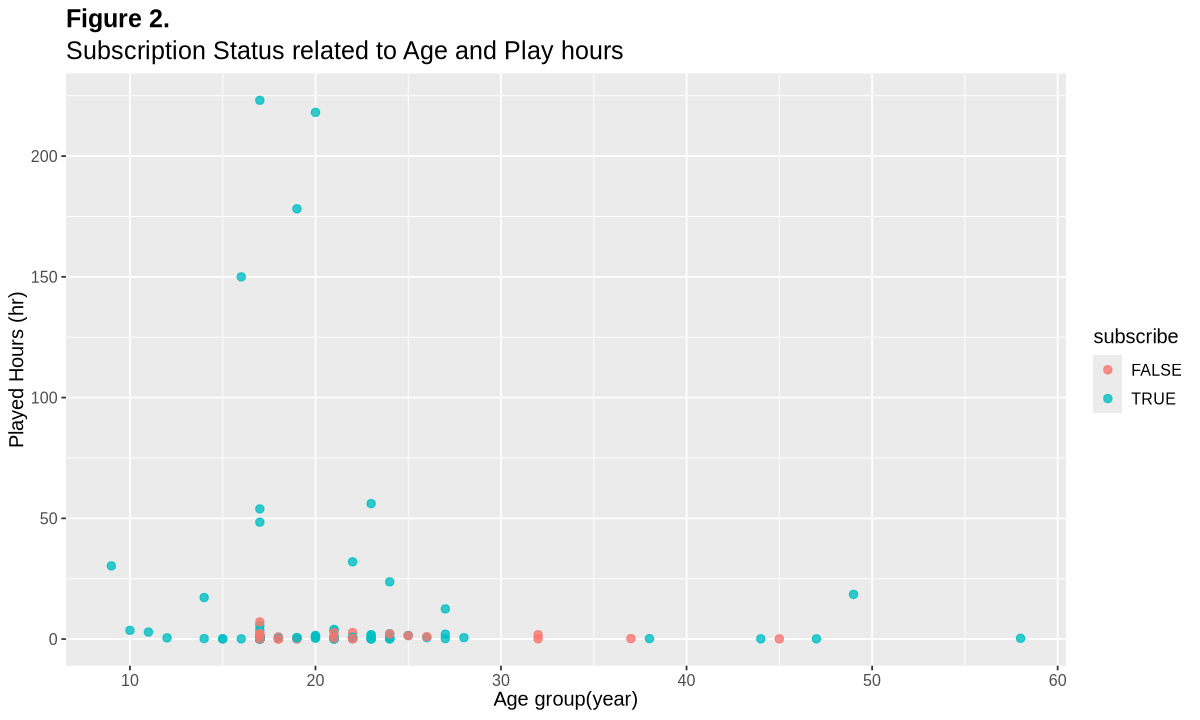

In [51]:
play_hours_distribution <- clean_players |>
ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
  geom_point(alpha = 0.8, size = 2) +
labs(
    title = "Figure 2.",                                         
    subtitle = "Subscription Status related to Age and Play hours",  
    x = "Age group(year)",
    y = "Played Hours (hr)" , 
    fill = "Subscribed to newsletter?") +
  theme(
    plot.title = element_text(face = "bold", size = 15),        
    plot.subtitle = element_text(size = 15),
    text = element_text(size = 12))

play_hours_distribution

Given our visualization above, we can observe that all players with high playtime have subscribed, while those without subscriptions are concentrated in the under 10-hour range. From this, we can also tell that the majority of players have a low playtime

`summarise()` has grouped output by 'experience', 'played_hours'. You can
override using the `.groups` argument.


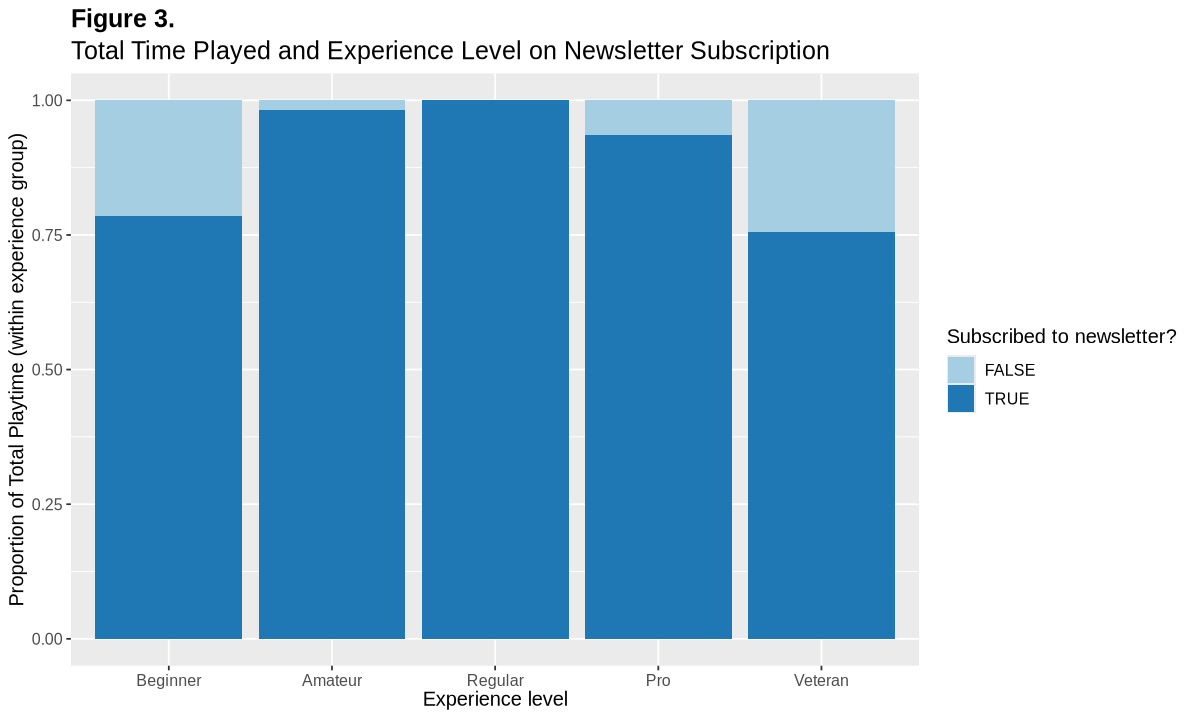

In [49]:
players_tidy <- clean_players |>
  mutate(
    experience = factor(
      experience,
      levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")))
players_plot <- players_tidy|> 
group_by(experience, played_hours, subscribe) |>
summarise(total_hours = sum(played_hours, na.rm = TRUE))|>
ggplot(aes(x = experience, y = total_hours, fill = subscribe)) + 
geom_bar(stat = "identity", position = "fill") + 
scale_fill_brewer(palette = "Paired") +
labs(
    title = "Figure 3.",                                         
    subtitle = "Total Time Played and Experience Level on Newsletter Subscription",  
    x = "Experience level",
    y = "Proportion of Total Playtime (within experience group)", 
    fill = "Subscribed to newsletter?") +
  theme(
    plot.title = element_text(face = "bold", size = 15),        
    plot.subtitle = element_text(size = 15),
    text = element_text(size = 12))

players_plot

options(repr.plot.width = 10, repr.plot.height = 6)

### **Predictive Analysis**

In order to answer our question, we must use a method that allows us to predict whether or not a given player will subscribe to the dataset based on their hours played and age.

The chosen method that we used was the K-nearest neighbors classification algorithm. This classifier is used to generally find the K "nearest" or "most similar" observaton in our training set, and then using their diagnoses to create a predicioton for the new observations diagnosis(Timbers, 2024). 

When considering the use of the model, we were sure to scale the variables involved. Since the classifier predicts classes by identifying observations nearest to it, any variables with a large scale will have a much larger effect than variables with a small scale. However, this is not the case. Within our dataset, we must ensure that all the variables are weighted equally as they are both responsible for determining whether a person is likely to subscribe to the newsletter (Timbers, 2024). 

Likewise, the data will also be centered. When we do this, the data is said to be standardized, and all the variables will have a mean of 0 and a standard deviation of 1. 

It is worth mentioning that the value of K is important when useing the K-nearest neighbors algorithm. By picking different values of K, we create different classifiers that make different predictions. Using the training dataset (in this case called a validation set), we will perform cross validation. Cross validation splits the trainign data into folds, from which it uses each fold to to test and train the model to get a more reliable estimate (prevents overfitting) (Timbers, 2024). Specifically for our analysis, the method we will use is 5-fold cross-validation (5 different choices for the validation set). 



To begine, we first need to filter out NA values and mutate the subscribe variable to be a factor. Filtering out rows where Age is NA is necessary because KNN and most machine learning methods require complete numeric inputs. Missing ages would interfere with distance calculations and reduce model reliability, so removing them improves model performance and data integrity. Converting subscribe into a factor is important because classification algorithms in R require categorical outcomes to be factors.

In [31]:
players_pred <- players |>
    select(experience, Age, played_hours, subscribe) |>
    
    # remove players with missing Age values
    filter(Age != "NA") |>
    # convert subscribe column into a factor (for classification)
    mutate(subscribe = as_factor(subscribe)) |>
        mutate(subscribe = fct_recode(subscribe,
                                 "Subscribed" = "TRUE",
                                 "Not Subscribed" = "FALSE"))
head(players_pred)

experience,Age,played_hours,subscribe
<chr>,<dbl>,<dbl>,<fct>
Pro,9,30.3,Subscribed
Veteran,17,3.8,Subscribed
Veteran,17,0.0,Not Subscribed
Amateur,21,0.7,Subscribed
Regular,21,0.1,Subscribed
Amateur,17,0.0,Subscribed


In [39]:
set.seed(1)   # ensures the data split is reproducible

# Split data into 75% training and 25% testing, keeping subscribe proportions consistent
players_split <- initial_split(players_pred, prop = 0.75, strata = subscribe)
players_train <- training(players_split) 
players_test  <- testing(players_split)

# Create 5-fold cross-validation sets for tuning
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

# Build a tunable KNN model (k will be selected later)
knn_spec_tune <- nearest_neighbor(weight_func = "rectangular",
                                  neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# Preprocess training variables (scale & center so KNN distance works properly)
player_train_recipe <- recipe(subscribe ~ Age + played_hours, data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# Create list of k values to test (1 to 50, step of 3)
k_vals <- tibble(neighbors = seq(from = 1, to = 25, by = 3))

# Fit model across different k values using cross-validation and collect accuracy results
knn_results <- workflow() |>
  add_recipe(player_train_recipe) |>
  add_model(knn_spec_tune) |>
  tune_grid(resamples = players_vfold, grid = k_vals) |>
  collect_metrics()

# Extract only accuracy scores for plotting and model selection
accuracies <- knn_results |>
  filter(.metric == "accuracy")

head(accuracies)



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4549261,5,0.02080370,Preprocessor1_Model1
4,accuracy,binary,0.5098686,5,0.03117556,Preprocessor1_Model2
7,accuracy,binary,0.5645813,5,0.03150480,Preprocessor1_Model3
10,accuracy,binary,0.5712479,5,0.04038172,Preprocessor1_Model4
13,accuracy,binary,0.6746962,5,0.05894554,Preprocessor1_Model5
16,accuracy,binary,0.6902135,5,0.02690613,Preprocessor1_Model6


We used set.seed(1) before the train/test split and cross-validation so that the random sampling of rows and folds is reproducible and gives consistent accuracy estimates across runs. 

neighbors,mean,percent accuracy
<dbl>,<dbl>,<dbl>
19,0.7380296,73.80296


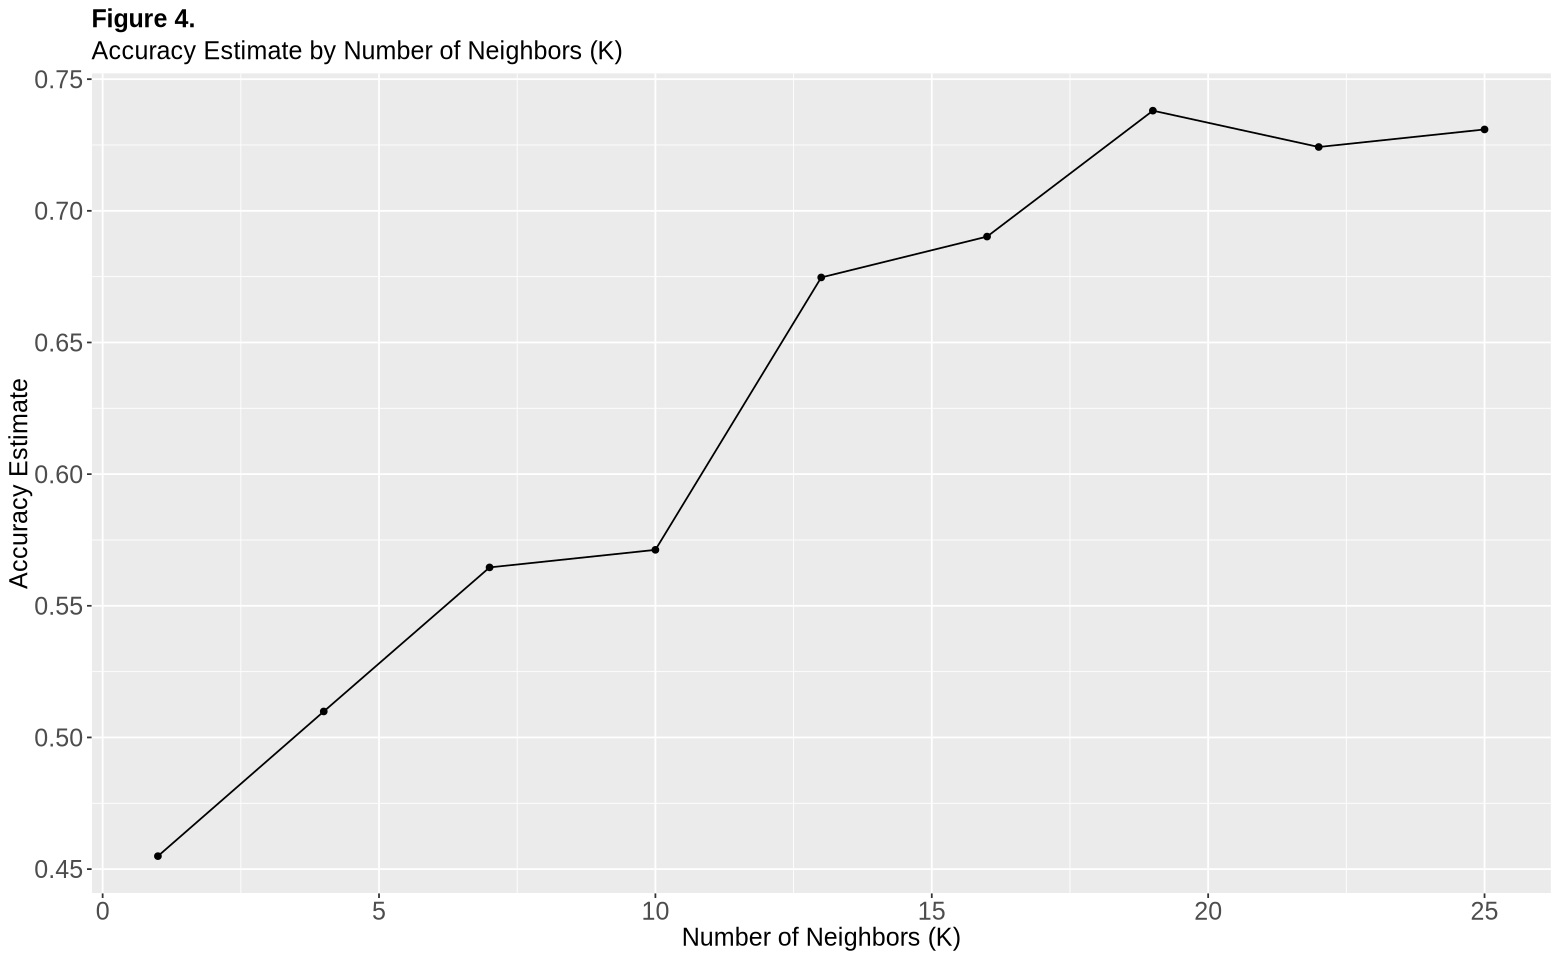

In [53]:
#Plot of Accuracy over number of Neighbors to determine optimal k
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(
    title = "Figure 4.",                                         
    subtitle = "Accuracy Estimate by Number of Neighbors (K)",  
    x = "Number of Neighbors (K)",
    y = "Accuracy Estimate"
  ) +
  theme(
    plot.title = element_text(face = "bold", size = 15),        
    plot.subtitle = element_text(size = 15),
    axis.title = element_text(size = 15),
    axis.text = element_text(size = 15))

accuracy_vs_k
# percent accuracy of best k
best_k <- accuracies |>
    arrange(desc(mean)) |>
    head(1) |>
    select(neighbors, mean) |>
    mutate("percent accuracy" = mean*100)
best_k


The plot shows the accuracy of the K-Nearest Neighbors classifier across different values of k. At very low neighbor values (k = 1–5), the accuracy is low, indicating that the model is likely overfitting to individual data points and is too sensitive to noise. As k increases, accuracy improves significantly, reaching a strong upward trend between k = 10 and k ≈ 20. This suggests that the model benefits from smoothing and begins generalizing better. The highest accuracy appears at k = 19, where result peak at  0.74 and demonstrate the highest accuracy. Beyond k = 20, the curve plateaus, meaning increasing k further does not improve performance and may slightly increase bias without adding benefit. Overall, k = 19 seems to offer the best balance between variance and bias for this dataset, making it a suitable choice for the final model. Thus, from the plot of accuracy based on different values of K, we can clearly denote that K = 19 provides the highest accuracy in predictions. Now having established a k-value suitable for classifying our test data, we can re-establish a new model with neighbors = 19 to later predict on the test data. 

In [36]:
# Build the final KNN model using the best k (19) found from tuning
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) |>
    set_engine("kknn") |>           
    set_mode("classification")     

# Preprocess data: scale & center numeric predictors so KNN distance works properly
player_recipe <- recipe(subscribe ~ Age + played_hours, data = players_pred) |>
    step_scale(all_predictors()) |>   # scale predictors
    step_center(all_predictors())     # center predictors

# Combine recipe + model into a workflow and fit on the training data
knn_fit <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(knn_spec) |>
    fit(data = players_train)        

knn_fit   

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(19,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2896552
Best kernel: rectangular
Best k: 19

In [26]:
players_prediction <- predict(knn_fit, players_test) |>
    bind_cols(players_test) 
head(players_prediction)


.pred_class,experience,Age,played_hours,subscribe
<fct>,<chr>,<dbl>,<dbl>,<fct>
Subscribed,Amateur,21,0.7,Subscribed
Subscribed,Regular,21,0.1,Subscribed
Subscribed,Amateur,17,0.0,Subscribed
Subscribed,Regular,19,0.0,Subscribed
Subscribed,Amateur,21,0.0,Not Subscribed
Subscribed,Veteran,22,0.0,Subscribed


In [54]:
players_prediction |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6734694


In [28]:
players_prediction |> pull(subscribe) |> levels()


players_prediction |>
    precision(truth = subscribe, estimate = .pred_class, event_level = "second")


[1] "Not Subscribed" "Subscribed"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7272727


In [29]:
players_prediction |>
    recall(truth = subscribe, estimate = .pred_class, event_level = "second")


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.8888889


In [30]:
confusion <- players_prediction |>
    conf_mat(truth = subscribe, estimate = .pred_class)
confusion



                Truth
Prediction       Not Subscribed Subscribed
  Not Subscribed              1          4
  Subscribed                 12         32

### **Discussion**

Sources: 

Timbers, T. (2024, August 21). Chapter 5 Classification I: training & predicting |  Data Science. Datasciencebook.ca.  
    https://datasciencebook.ca/classification1.html#classification-with-k-nearest-neighbors